# **Connect to ChEMBL database**

In [1]:
!pip install chembl-webresource-client
!pip install rdkit
import math
from pathlib import Path
from zipfile import ZipFile
from tempfile import TemporaryDirectory

import numpy as np
import pandas as pd
from rdkit.Chem import PandasTools
from chembl_webresource_client.new_client import new_client
from tqdm.auto import tqdm
HERE = Path(_dh[-1])
DATA = HERE / "data"
targets_api = new_client.target
compounds_api = new_client.molecule
bioactivities_api = new_client.activity
type(targets_api)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.1/35.1 MB 10.2 MB/s eta 0:00:00


chembl_webresource_client.query_set.QuerySet

# **Get target data**

## *Fetch target data from ChEMBL*

In [2]:
uniprot_id = "P10415"
# Get target information from ChEMBL but restrict it to specified values only
targets = targets_api.get(target_components__accession=uniprot_id).only(
    "target_chembl_id", "organism", "pref_name", "target_type"
)
print(f'The type of the targets is "{type(targets)}"')

The type of the targets is "<class 'chembl_webresource_client.query_set.QuerySet'>"


## *Download target data from ChEMBL*

In [3]:
targets = pd.DataFrame.from_records(targets)
targets

organism                                          pref_name  \
0  Homo sapiens                          Apoptosis regulator Bcl-2   
1  Homo sapiens                          Apoptosis regulator Bcl-2   
2  Homo sapiens                      Apoptosis regulator BAX/Bcl-2   
3  Homo sapiens  Apoptosis regulator Bcl-2/Bcl-2 homologous ant...   
4  Homo sapiens         Protein cereblon/Apoptosis regulator Bcl-2   
5  Homo sapiens                      VHL/Apoptosis regulator Bcl-2   
6  Homo sapiens                                       BCL2/BCL2L11   
7  Homo sapiens                                           BCL2/BID   
8  Homo sapiens                                           BCL2/BAD   

  target_chembl_id                  target_type  
0       CHEMBL4860               SINGLE PROTEIN  
1       CHEMBL4860               SINGLE PROTEIN  
2    CHEMBL3885513  PROTEIN-PROTEIN INTERACTION  
3    CHEMBL3885516  PROTEIN-PROTEIN INTERACTION  
4    CHEMBL4523685  PROTEIN-PROTEIN INTERACTION  
5    CHEMBL4748224  PROTEIN-PROTEIN INTERACTION  
6    CHEMBL5169264  PROTEIN-PROTEIN INTERACTION  
7    CHEMBL5169265  PROTEIN-PROTEIN INTERACTION  
8    CHEMBL5169266  PROTEIN-PROTEIN INTERACTION

## *Select target (target ChEMBL ID)*

In [4]:
target = targets.iloc[0]
target

organism                         Homo sapiens
pref_name           Apoptosis regulator Bcl-2
target_chembl_id                   CHEMBL4860
target_type                    SINGLE PROTEIN
Name: 0, dtype: object

## *Save selected ChEMBL ID.*

In [5]:
chembl_id = target.target_chembl_id
print(f"The target ChEMBL ID is {chembl_id}")
# NBVAL_CHECK_OUTPUT

The target ChEMBL ID is CHEMBL4860


# **Get bioactivity data**

## Fetch bioactivity data for the target from ChEMBL

In [6]:
bioactivities = bioactivities_api.filter(
    target_chembl_id=chembl_id, type="IC50", relation="=", assay_type="B"
).only(
    "activity_id",
    "assay_chembl_id",
    "assay_description",
    "assay_type",
    "molecule_chembl_id",
    "type",
    "standard_units",
    "relation",
    "standard_value",
    "target_chembl_id",
    "target_organism",
)

print(f"Length and type of bioactivities object: {len(bioactivities)}, {type(bioactivities)}")

Length and type of bioactivities object: 985, <class 'chembl_webresource_client.query_set.QuerySet'>


In [7]:
print(f"Length and type of first element: {len(bioactivities[0])}, {type(bioactivities[0])}")
bioactivities[0]

Length and type of first element: 13, <class 'dict'>


{'activity_id': 305155,
 'assay_chembl_id': 'CHEMBL651292',
 'assay_description': 'In vitro inhibitory activity against Bak-Bh3 peptide binding to the Bcl-2 using human myeloid leukemia cell line HL-60',
 'assay_type': 'B',
 'molecule_chembl_id': 'CHEMBL337153',
 'relation': '=',
 'standard_units': 'nM',
 'standard_value': '14000.0',
 'target_chembl_id': 'CHEMBL4860',
 'target_organism': 'Homo sapiens',
 'type': 'IC50',
 'units': 'uM',
 'value': '14.0'}

## Download bioactivity data from ChEMBL

In [8]:
bioactivities_df = pd.DataFrame.from_dict(bioactivities)
print(f"DataFrame shape: {bioactivities_df.shape}")
bioactivities_df.head()

DataFrame shape: (985, 13)


activity_id assay_chembl_id  \
0       305155    CHEMBL651292   
1       307747    CHEMBL651292   
2       310418    CHEMBL651292   
3       320523    CHEMBL651291   
4       324314    CHEMBL651293   

                                   assay_description assay_type  \
0  In vitro inhibitory activity against Bak-Bh3 p...          B   
1  In vitro inhibitory activity against Bak-Bh3 p...          B   
2  In vitro inhibitory activity against Bak-Bh3 p...          B   
3  In vitro inhibitory activity against Bak-Bh3 p...          B   
4                  Inhibitory activity against Bcl-2          B   

  molecule_chembl_id relation standard_units standard_value target_chembl_id  \
0       CHEMBL337153        =             nM        14000.0       CHEMBL4860   
1       CHEMBL340270        =             nM        11700.0       CHEMBL4860   
2       CHEMBL443221        =             nM         1600.0       CHEMBL4860   
3       CHEMBL135934        =             nM         7700.0       CHEMBL4860   
4       CHEMBL137135        =             nM         9000.0       CHEMBL4860   

  target_organism  type units value  
0    Homo sapiens  IC50    uM  14.0  
1    Homo sapiens  IC50    uM  11.7  
2    Homo sapiens  IC50    uM   1.6  
3    Homo sapiens  IC50    uM   7.7  
4    Homo sapiens  IC50    uM   9.0

In [9]:
bioactivities_df["units"].unique()

array(['uM', 'nM'], dtype=object)

In [10]:
bioactivities_df.drop(["units", "value"], axis=1, inplace=True)
bioactivities_df.head()

activity_id assay_chembl_id  \
0       305155    CHEMBL651292   
1       307747    CHEMBL651292   
2       310418    CHEMBL651292   
3       320523    CHEMBL651291   
4       324314    CHEMBL651293   

                                   assay_description assay_type  \
0  In vitro inhibitory activity against Bak-Bh3 p...          B   
1  In vitro inhibitory activity against Bak-Bh3 p...          B   
2  In vitro inhibitory activity against Bak-Bh3 p...          B   
3  In vitro inhibitory activity against Bak-Bh3 p...          B   
4                  Inhibitory activity against Bcl-2          B   

  molecule_chembl_id relation standard_units standard_value target_chembl_id  \
0       CHEMBL337153        =             nM        14000.0       CHEMBL4860   
1       CHEMBL340270        =             nM        11700.0       CHEMBL4860   
2       CHEMBL443221        =             nM         1600.0       CHEMBL4860   
3       CHEMBL135934        =             nM         7700.0       CHEMBL4860   
4       CHEMBL137135        =             nM         9000.0       CHEMBL4860   

  target_organism  type  
0    Homo sapiens  IC50  
1    Homo sapiens  IC50  
2    Homo sapiens  IC50  
3    Homo sapiens  IC50  
4    Homo sapiens  IC50

## Preprocess and filter bioactivity data

### 1. Convert datatype of “standard_value” from “object” to “float”

In [11]:
bioactivities_df.dtypes


activity_id            int64
assay_chembl_id       object
assay_description     object
assay_type            object
molecule_chembl_id    object
relation              object
standard_units        object
standard_value        object
target_chembl_id      object
target_organism       object
type                  object
dtype: object

In [12]:
bioactivities_df = bioactivities_df.astype({"standard_value": "float64"})
bioactivities_df.dtypes

activity_id             int64
assay_chembl_id        object
assay_description      object
assay_type             object
molecule_chembl_id     object
relation               object
standard_units         object
standard_value        float64
target_chembl_id       object
target_organism        object
type                   object
dtype: object

### 2. Delete entries with missing values

In [13]:
bioactivities_df.dropna(axis=0, how="any", inplace=True)
print(f"DataFrame shape: {bioactivities_df.shape}")

DataFrame shape: (985, 11)


### 3. Keep only entries with “standard_unit == nM”

In [14]:
print(f"Units in downloaded data: {bioactivities_df['standard_units'].unique()}")
print(
    f"Number of non-nM entries:\
    {bioactivities_df[bioactivities_df['standard_units'] != 'nM'].shape[0]}"
)

Units in downloaded data: ['nM']
Number of non-nM entries:    0


In [15]:
print(f"DataFrame shape: {bioactivities_df.shape}")

DataFrame shape: (985, 11)


### 4. Delete duplicate molecules

In [16]:
bioactivities_df.drop_duplicates("molecule_chembl_id", keep="first", inplace=True)
print(f"DataFrame shape: {bioactivities_df.shape}")

DataFrame shape: (836, 11)


### 5. Reset “DataFrame” index

In [17]:
bioactivities_df.reset_index(drop=True, inplace=True)
bioactivities_df.head()

activity_id assay_chembl_id  \
0       305155    CHEMBL651292   
1       307747    CHEMBL651292   
2       310418    CHEMBL651292   
3       320523    CHEMBL651291   
4       324314    CHEMBL651293   

                                   assay_description assay_type  \
0  In vitro inhibitory activity against Bak-Bh3 p...          B   
1  In vitro inhibitory activity against Bak-Bh3 p...          B   
2  In vitro inhibitory activity against Bak-Bh3 p...          B   
3  In vitro inhibitory activity against Bak-Bh3 p...          B   
4                  Inhibitory activity against Bcl-2          B   

  molecule_chembl_id relation standard_units  standard_value target_chembl_id  \
0       CHEMBL337153        =             nM         14000.0       CHEMBL4860   
1       CHEMBL340270        =             nM         11700.0       CHEMBL4860   
2       CHEMBL443221        =             nM          1600.0       CHEMBL4860   
3       CHEMBL135934        =             nM          7700.0       CHEMBL4860   
4       CHEMBL137135        =             nM          9000.0       CHEMBL4860   

  target_organism  type  
0    Homo sapiens  IC50  
1    Homo sapiens  IC50  
2    Homo sapiens  IC50  
3    Homo sapiens  IC50  
4    Homo sapiens  IC50

### 6. Rename columns

In [18]:
bioactivities_df.rename(
    columns={"standard_value": "IC50", "standard_units": "units"}, inplace=True
)
bioactivities_df.head()

activity_id assay_chembl_id  \
0       305155    CHEMBL651292   
1       307747    CHEMBL651292   
2       310418    CHEMBL651292   
3       320523    CHEMBL651291   
4       324314    CHEMBL651293   

                                   assay_description assay_type  \
0  In vitro inhibitory activity against Bak-Bh3 p...          B   
1  In vitro inhibitory activity against Bak-Bh3 p...          B   
2  In vitro inhibitory activity against Bak-Bh3 p...          B   
3  In vitro inhibitory activity against Bak-Bh3 p...          B   
4                  Inhibitory activity against Bcl-2          B   

  molecule_chembl_id relation units     IC50 target_chembl_id target_organism  \
0       CHEMBL337153        =    nM  14000.0       CHEMBL4860    Homo sapiens   
1       CHEMBL340270        =    nM  11700.0       CHEMBL4860    Homo sapiens   
2       CHEMBL443221        =    nM   1600.0       CHEMBL4860    Homo sapiens   
3       CHEMBL135934        =    nM   7700.0       CHEMBL4860    Homo sapiens   
4       CHEMBL137135        =    nM   9000.0       CHEMBL4860    Homo sapiens   

   type  
0  IC50  
1  IC50  
2  IC50  
3  IC50  
4  IC50

In [19]:
print(f"DataFrame shape: {bioactivities_df.shape}")

DataFrame shape: (836, 11)


# Get compound data

## Fetch compound data from ChEMBL

In [20]:
compounds_provider = compounds_api.filter(
    molecule_chembl_id__in=list(bioactivities_df["molecule_chembl_id"])
).only("molecule_chembl_id", "molecule_structures")

## Download compound data from ChEMBL

In [21]:
compounds = list(tqdm(compounds_provider))
compounds_df = pd.DataFrame.from_records(
    compounds,
)
print(f"DataFrame shape: {compounds_df.shape}")
compounds_df.head()

  0%|          | 0/836 [00:00<?, ?it/s]

DataFrame shape: (836, 2)


molecule_chembl_id                                molecule_structures
0       CHEMBL288542  {'canonical_smiles': 'CCOC(=O)C1=C(N)Oc2ccc(Br...
1        CHEMBL51483  {'canonical_smiles': 'Cc1cc2c(C(C)C)c(O)c(O)c(...
2       CHEMBL106708  {'canonical_smiles': 'O=C(O)c1ccc(-c2ccc(F)cc2...
3       CHEMBL334590  {'canonical_smiles': 'Cc1cc(Cl)cc(C(=O)Nc2cc(S...
4       CHEMBL137135  {'canonical_smiles': 'CCOC(=O)C(C#N)C1c2cc(Br)...

## Preprocess and filter compound data

### 1. Remove entries with missing molecule structure entry

In [22]:
compounds_df.dropna(axis=0, how="any", inplace=True)
print(f"DataFrame shape: {compounds_df.shape}")

DataFrame shape: (836, 2)


### 2. Delete duplicate molecules

In [23]:
compounds_df.drop_duplicates("molecule_chembl_id", keep="first", inplace=True)
print(f"DataFrame shape: {compounds_df.shape}")

DataFrame shape: (836, 2)


### 3. Get molecules with canonical SMILES

In [24]:
compounds_df.iloc[0].molecule_structures.keys()
canonical_smiles = []

for i, compounds in compounds_df.iterrows():
    try:
        canonical_smiles.append(compounds["molecule_structures"]["canonical_smiles"])
    except KeyError:
        canonical_smiles.append(None)

compounds_df["smiles"] = canonical_smiles
compounds_df.drop("molecule_structures", axis=1, inplace=True)
print(f"DataFrame shape: {compounds_df.shape}")


DataFrame shape: (836, 2)


In [25]:
compounds_df.dropna(axis=0, how="any", inplace=True)
print(f"DataFrame shape: {compounds_df.shape}")

DataFrame shape: (836, 2)


# Output (bioactivity-compound) data

## Summary of compound and bioactivity data

In [26]:
print(f"Bioactivities filtered: {bioactivities_df.shape[0]}")
bioactivities_df.columns

Bioactivities filtered: 836


Index(['activity_id', 'assay_chembl_id', 'assay_description', 'assay_type',
       'molecule_chembl_id', 'relation', 'units', 'IC50', 'target_chembl_id',
       'target_organism', 'type'],
      dtype='object')

In [27]:
print(f"Compounds filtered: {compounds_df.shape[0]}")
compounds_df.columns

Compounds filtered: 836


Index(['molecule_chembl_id', 'smiles'], dtype='object')

## Merge both datasets

In [28]:
# Merge DataFrames
output_df = pd.merge(
    bioactivities_df[["molecule_chembl_id", "IC50", "units"]],
    compounds_df,
    on="molecule_chembl_id",
)

# Reset row indices
output_df.reset_index(drop=True, inplace=True)

print(f"Dataset with {output_df.shape[0]} entries.")

Dataset with 836 entries.


In [29]:
output_df.dtypes

molecule_chembl_id     object
IC50                  float64
units                  object
smiles                 object
dtype: object

In [30]:
output_df.head(10)

molecule_chembl_id     IC50 units  \
0       CHEMBL337153  14000.0    nM   
1       CHEMBL340270  11700.0    nM   
2       CHEMBL443221   1600.0    nM   
3       CHEMBL135934   7700.0    nM   
4       CHEMBL137135   9000.0    nM   
5       CHEMBL334590   3300.0    nM   
6       CHEMBL344184  10400.0    nM   
7       CHEMBL540363   5800.0    nM   
8       CHEMBL137800  10400.0    nM   
9       CHEMBL436605   2000.0    nM   

                                              smiles  
0  O=c1c2ccc(S(=O)(=O)c3ccc4c(=O)n5c6ccccc6nc5c5c...  
1       Brc1cccc[n+]1-c1ccc2cc(-[n+]3ccccc3Br)ccc2c1  
2   Nc1nc(-c2ccccc2)nc2c1[n+]([O-])c1ccccc1[n+]2[O-]  
3  O=C1c2cc(Br)ccc2-c2ccc3c4ccc5c6c(ccc(c7ccc1c2c...  
4        CCOC(=O)C(C#N)C1c2cc(Br)ccc2OC(N)C1C(=O)OCC  
5  Cc1cc(Cl)cc(C(=O)Nc2cc(S(=O)(=O)c3ccc(Cl)cc3)c...  
6  COc1ccc2c(c1)CCc1cc(OC)ccc1/[N+]([O-])=[N+]\2[O-]  
7  Cl.N=C(N)c1ccc(/N=N/c2c(O)ccc3c2[nH]c2ccccc23)cc1  
8       COc1ccc2c(c1)C(=O)C1C=C([N+]#N)C=CC1N2.[Cl-]  
9  CCCC[C@H]1C(=O)O[C@H](C)[C@H](NC(=O)c2cccc(NC=...

## Add pIC50 values

In [31]:
def convert_ic50_to_pic50(IC50_value):
    pIC50_value = 9 - math.log10(IC50_value)
    return pIC50_value

In [32]:
# Apply conversion to each row of the compounds DataFrame
output_df["pIC50"] = output_df.apply(lambda x: convert_ic50_to_pic50(x.IC50), axis=1)

In [33]:
output_df.head()

molecule_chembl_id     IC50 units  \
0       CHEMBL337153  14000.0    nM   
1       CHEMBL340270  11700.0    nM   
2       CHEMBL443221   1600.0    nM   
3       CHEMBL135934   7700.0    nM   
4       CHEMBL137135   9000.0    nM   

                                              smiles     pIC50  
0  O=c1c2ccc(S(=O)(=O)c3ccc4c(=O)n5c6ccccc6nc5c5c...  4.853872  
1       Brc1cccc[n+]1-c1ccc2cc(-[n+]3ccccc3Br)ccc2c1  4.931814  
2   Nc1nc(-c2ccccc2)nc2c1[n+]([O-])c1ccccc1[n+]2[O-]  5.795880  
3  O=C1c2cc(Br)ccc2-c2ccc3c4ccc5c6c(ccc(c7ccc1c2c...  5.113509  
4        CCOC(=O)C(C#N)C1c2cc(Br)ccc2OC(N)C1C(=O)OCC  5.045757

## Draw compound data

array([[<Axes: title={'center': 'pIC50'}>]], dtype=object)

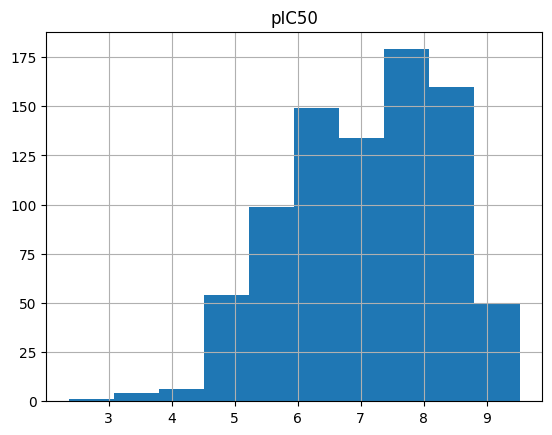

In [34]:
output_df.hist(column="pIC50")

In [35]:
# Add molecule column
PandasTools.AddMoleculeColumnToFrame(output_df, smilesCol="smiles")

In [36]:
# Sort molecules by pIC50
output_df.sort_values(by="pIC50", ascending=False, inplace=True)

# Reset index
output_df.reset_index(drop=True, inplace=True)

In [37]:
output_df.drop("smiles", axis=1).head(3)

molecule_chembl_id  IC50 units     pIC50  \
0      CHEMBL3966290   0.3    nM  9.522879   
1      CHEMBL4111781   0.3    nM  9.522879   
2      CHEMBL3703616   0.3    nM  9.522879   

                                              ROMol  
0  <rdkit.Chem.rdchem.Mol object at 0x78fb516d5770>  
1  <rdkit.Chem.rdchem.Mol object at 0x78fb516dc7b0>  
2  <rdkit.Chem.rdchem.Mol object at 0x78fb516d5690>

In [38]:
# Prepare saving the dataset: Drop the ROMol column
output_df = output_df.drop("ROMol", axis=1)
print(f"DataFrame shape: {output_df.shape}")

DataFrame shape: (836, 5)


## Write output data to file

In [39]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [40]:
# Write output data to file
output_df.to_csv('/content/drive/My Drive/3.Thesis 2/Weekly tasks/Teachopen CADD/bioactivities_data.csv')
